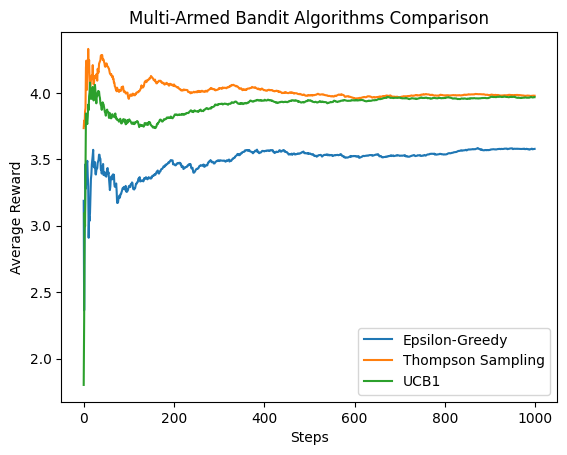

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits
        self.true_means = np.random.normal(0, 1, num_bandits)
        self.estimated_means = np.zeros(num_bandits)
        self.action_counts = np.zeros(num_bandits)
        self.total_pulls = 0

    def pull_bandit(self, bandit_index):
        true_reward = np.random.normal(self.true_means[bandit_index], 1)
        return true_reward

    def epsilon_greedy_algorithm(self, epsilon):
        if np.random.rand() < epsilon:
            # Explore: Choose a random bandit
            action = np.random.choice(self.num_bandits)
        else:
            # Exploit: Choose the bandit with the highest estimated mean
            action = np.argmax(self.estimated_means)
        return action

    def thompson_sampling_algorithm(self):
        sampled_means = np.random.normal(self.estimated_means, 1 / np.sqrt(self.action_counts + 1e-6))
        action = np.argmax(sampled_means)
        return action

    def ucb1_algorithm(self):
        exploration_term = np.sqrt(2 * np.log(self.total_pulls + 1) / (self.action_counts + 1e-6))
        ucb_values = self.estimated_means + exploration_term
        action = np.argmax(ucb_values)
        return action

    def run_bandit_experiment(self, num_steps, algorithm_func, **kwargs):
        cumulative_rewards = np.zeros(num_steps)

        for step in range(num_steps):
            self.total_pulls += 1
            action = algorithm_func(**kwargs)
            reward = self.pull_bandit(action)

            # Update estimated mean and action count
            self.action_counts[action] += 1
            self.estimated_means[action] += (reward - self.estimated_means[action]) / self.action_counts[action]

            cumulative_rewards[step] = reward

        return cumulative_rewards

def main():
    num_bandits = 10
    num_steps = 1000
    epsilon = 0.1

    bandit = MultiArmedBandit(num_bandits)

    # Epsilon-Greedy
    cumulative_rewards_epsilon = bandit.run_bandit_experiment(num_steps, bandit.epsilon_greedy_algorithm, epsilon=epsilon)

    # Thompson Sampling
    cumulative_rewards_thompson = bandit.run_bandit_experiment(num_steps, bandit.thompson_sampling_algorithm)

    # UCB1
    cumulative_rewards_ucb1 = bandit.run_bandit_experiment(num_steps, bandit.ucb1_algorithm)

    # Plot results
    plt.plot(np.cumsum(cumulative_rewards_epsilon) / np.arange(1, num_steps + 1), label='Epsilon-Greedy')
    plt.plot(np.cumsum(cumulative_rewards_thompson) / np.arange(1, num_steps + 1), label='Thompson Sampling')
    plt.plot(np.cumsum(cumulative_rewards_ucb1) / np.arange(1, num_steps + 1), label='UCB1')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Multi-Armed Bandit Algorithms Comparison')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


 Armed BAndit Problem


This Python code demonstrates the implementation of three algorithms for solving the multi-armed bandit problem: Epsilon-Greedy, Thompson Sampling, and UCB1 (Upper Confidence Bound).

Here's a breakdown of the code:

1. **Importing Libraries**: NumPy is imported for numerical computations, and Matplotlib is imported for plotting.

2. **MultiArmedBandit Class**: This class represents the multi-armed bandit problem. It contains methods to initialize the bandits, pull a bandit, and run bandit experiments using different algorithms.

3. **__init__()**: Constructor method initializes the bandits' true means, estimated means, action counts, and total pulls.

4. **pull_bandit()**: Method to simulate pulling a bandit. It returns a reward sampled from a normal distribution with mean equal to the true mean of the bandit and standard deviation 1.

5. **epsilon_greedy_algorithm()**: Epsilon-Greedy algorithm implementation. It chooses between exploration (randomly selecting a bandit) and exploitation (selecting the bandit with the highest estimated mean) based on a specified epsilon value.

6. **thompson_sampling_algorithm()**: Thompson Sampling algorithm implementation. It samples means from a normal distribution based on the estimated means and the action counts, then selects the bandit with the highest sampled mean.

7. **ucb1_algorithm()**: UCB1 algorithm implementation. It calculates Upper Confidence Bounds for each bandit based on estimated means and action counts, then selects the bandit with the highest UCB value.

8. **run_bandit_experiment()**: Method to run a bandit experiment for a specified number of steps using a given algorithm. It updates the estimated means and action counts based on the chosen algorithm and returns cumulative rewards over time.

9. **main()**: Main function to run the experiments. It initializes the bandit, runs experiments for each algorithm, and plots the average rewards over time.

The code demonstrates the comparison of these algorithms in solving the multi-armed bandit problem by plotting the average rewards obtained over time for each algorithm.

Here's a shorter version:

1. Initialize bandits with unknown reward probabilities.
2. Choose a bandit based on a strategy (e.g., Epsilon-Greedy, Thompson Sampling, UCB1).
3. Pull the chosen bandit and update its reward estimate.
4. Repeat steps 2-3 and evaluate the strategy's performance based on cumulative rewards.